In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("cleaned_dataset.csv")

In [3]:
data.shape

(894, 14)

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
X = np.log(data.iloc[:,2:-1] + 1e-10) #take log of X
y = data.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Total Distance

In [10]:
x1_train = X_train.TotalDistance
x1_test = X_test.TotalDistance

In [11]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x1_train)
res = mod.fit()

y_pred = res.predict(x1_test)
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               Calories   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.034
Method:                 Least Squares   F-statistic:                              25.92
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    4.55e-07
Time:                        14:37:45   Log-Likelihood:                         -6580.8
No. Observations:                 715   AIC:                                  1.316e+04
Df Residuals:                     714   BIC:                                  1.317e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

[]

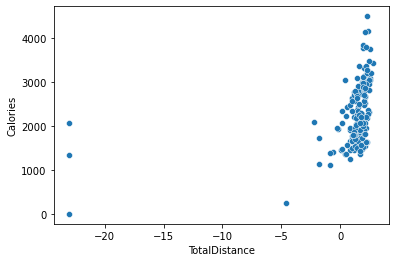

In [12]:
ax = sns.scatterplot(x=x1_test, y=y_test)
ax.set()

In [13]:
print("MSE:", mean_squared_error(y_pred,y_test) ) 
print("R^2:", r2_score(y_pred,y_test))

MSE: 5344041.890452906
R^2: -57.57166145491761


## Very Active Minutes

In [14]:
x2_train = X_train.VeryActiveMinutes
x2_test = X_test.VeryActiveMinutes

In [15]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x2_train)
res = mod.fit()

y_pred = res.predict(x2_test)
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               Calories   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              93.93
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    5.97e-21
Time:                        14:37:46   Log-Likelihood:                         -6549.4
No. Observations:                 715   AIC:                                  1.310e+04
Df Residuals:                     714   BIC:                                  1.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

[]

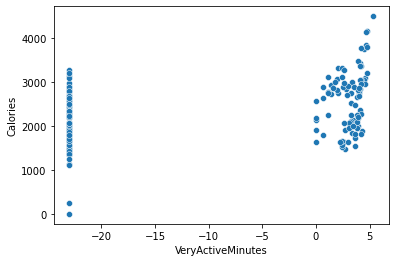

In [16]:
ax = sns.scatterplot(x=x2_test, y=y_test)
ax.set()

In [17]:
print("MSE:", mean_squared_error(y_pred,y_test) ) 
print("R^2:", r2_score(y_pred,y_test))

MSE: 4612672.144689774
R^2: -7.1975251477945825


## Total Steps

In [21]:
x3_train = X_train.TotalSteps
x3_test = X_test.TotalSteps

# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x3_train)
res = mod.fit()

y_pred = res.predict(x3_test)
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               Calories   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              1145.
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                   1.57e-150
Time:                        14:40:01   Log-Likelihood:                         -6251.4
No. Observations:                 715   AIC:                                  1.250e+04
Df Residuals:                     714   BIC:                                  1.251e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

[]

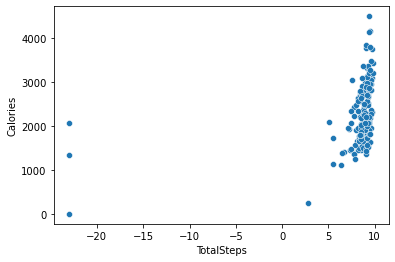

In [19]:
ax = sns.scatterplot(x=x3_test, y=y_test)
ax.set()

In [20]:
print("MSE:", mean_squared_error(y_pred,y_test) ) 
print("R^2:", r2_score(y_pred,y_test))

MSE: 1297414.559467556
R^2: -0.9300537612188808
